<a href="https://colab.research.google.com/github/jaedyxn/ait23-project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jaedyxn/ait23-project/blob/main/datasplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from urllib.request import urlretrieve
import numpy as np
import random
import sys
import re, cgi
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv("cleaned.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/aitdeeplearningproject/cleaned.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,CONS_NO,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,0,0387DD8A07E07FDA6271170F86AD9151,1,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
2,2,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.110000,0.530000,0.450000,0.510000,1.320000,0.710000,0.120000,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
3,3,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.910000,0.860000,1.100000,0.660000,5.820000,3.170000,1.180000,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
4,4,516954F5FF177CE314656D727FCC66A5,1,11.020000,8.240000,7.940000,7.920000,8.310000,7.390000,8.270000,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
def data_split(df, flag, label):
    flags = np.array(df[flag])
    df = df.drop(flag, axis=1)
    df = df.drop(label, axis=1)
    df = np.array(df)
    return flags, df

In [ ]:
train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['FLAG'])

In [ ]:
training_flags, training_data = data_split(train, 'FLAG', 'CONS_NO')

In [ ]:
test_flags, test_data = data_split(test, 'FLAG', 'CONS_NO')

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (training_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")

model.fit(training_data, training_flags, 
          epochs=10, batch_size=32, 
          #validation_data=(X_valid, Y_valid), # validation
          callbacks=[es],
          verbose=1)

Epoch 1/10
773/780 [============================>.] - ETA: 0s - loss: 4.3264 - accuracy: 0.9486

780/780 [==============================] - 4s 5ms/step - loss: 4.2990 - accuracy: 0.9486
Epoch 2/10
771/780 [============================>.] - ETA: 0s - loss: 1.3974 - accuracy: 0.9550

780/780 [==============================] - 4s 5ms/step - loss: 1.4091 - accuracy: 0.9549
Epoch 3/10
775/780 [============================>.] - ETA: 0s - loss: 1.0345 - accuracy: 0.9589

780/780 [==============================] - 5s 7ms/step - loss: 1.0592 - accuracy: 0.9588
Epoch 4/10
770/780 [============================>.] - ETA: 0s - loss: 0.3017 - accuracy: 0.9698

780/780 [==============================] - 4s 5ms/step - loss: 0.3004 - accuracy: 0.9697
Epoch 5/10
779/780 [============================>.] - ETA: 0s - loss: 0.0632 - accuracy: 0.9856

780/780 [==============================] - 4s 5ms/step - loss: 0.0637 - accuracy: 0.9855
Epoch 6/10
775/780 [============================>.] - ETA: 0s - loss: 0.1633 - accuracy: 0.9770

780/780 [==============================] - 4s 5ms/step - loss: 0.1627 - accuracy: 0.9771
Epoch 7/10
776/780 [============================>.] - ETA: 0s - loss: 0.1929 - accuracy: 0.9762

780/780 [==============================] - 5s 7ms/step - loss: 0.1976 - accuracy: 0.9760
Epoch 8/10
778/780 [============================>.] - ETA: 0s - loss: 0.1811 - accuracy: 0.9822

780/780 [==============================] - 4s 5ms/step - loss: 0.1807 - accuracy: 0.9822
Epoch 9/10
776/780 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9907

780/780 [==============================] - 4s 5ms/step - loss: 0.0286 - accuracy: 0.9907
Epoch 10/10
776/780 [============================>.] - ETA: 0s - loss: 0.0358 - accuracy: 0.9887

780/780 [==============================] - 5s 6ms/step - loss: 0.0356 - accuracy: 0.9887


In [ ]:
eval = model.evaluate(test_data, test_flags)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

195/195 [==============================] - 1s 2ms/step - loss: 2.2443 - accuracy: 0.9870
Test loss: 2.244290351867676
Test accuracy: 0.9870150685310364


195/195 [==============================] - 1s 3ms/step


<Axes: >

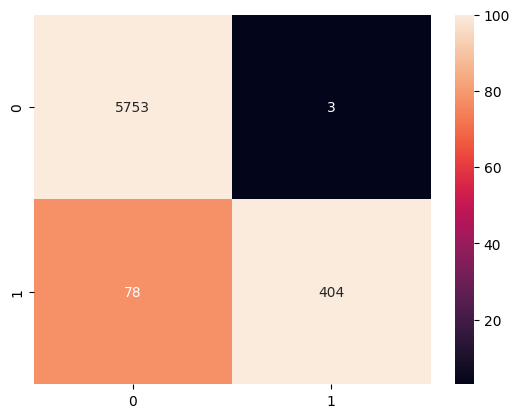

In [ ]:
preds = model.predict(test_data)
predsnp = np.array(preds)
predsround = np.where(predsnp >= 0.5, 1, 0)
conf=confusion_matrix(test_flags,predsround)
sns.heatmap(conf, annot=True, fmt='d', vmax=100)

In [ ]:
print("Accuracy: ",accuracy_score(test_flags, predsround))
print("Precision: ",precision_score(test_flags, predsround, average='macro'))
print("Recall: ", recall_score(test_flags, predsround, average='macro'))
print("F1: ",f1_score(test_flags, predsround, average='macro'))

Accuracy:  0.9870150689323501
Precision:  0.9896261066729254
Recall:  0.9188265392922125
F1:  0.9509478981477535


# Model Definition

In [ ]:
smote = SMOTE(sampling_strategy='minority')
training_data_smote, training_flags_smote = smote.fit_resample(training_data, training_flags)

In [ ]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape = (training_data_smote.shape[1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")

model2.fit(training_data_smote, training_flags_smote, 
          epochs=10, batch_size=32, 
          #validation_data=(X_valid, Y_valid), # validation
          callbacks=[es],
          verbose=1)

Epoch 1/10
1436/1439 [============================>.] - ETA: 0s - loss: 2.2285 - accuracy: 0.8963

1439/1439 [==============================] - 10s 6ms/step - loss: 2.2241 - accuracy: 0.8965
Epoch 2/10
1435/1439 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.9567

1439/1439 [==============================] - 7s 5ms/step - loss: 0.2567 - accuracy: 0.9568
Epoch 3/10
1431/1439 [============================>.] - ETA: 0s - loss: 0.0913 - accuracy: 0.9838

1439/1439 [==============================] - 8s 6ms/step - loss: 0.0910 - accuracy: 0.9838
Epoch 4/10
1433/1439 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9874

1439/1439 [==============================] - 8s 5ms/step - loss: 0.0536 - accuracy: 0.9875
Epoch 5/10
1436/1439 [============================>.] - ETA: 0s - loss: 0.4118 - accuracy: 0.9802

1439/1439 [==============================] - 11s 7ms/step - loss: 0.4110 - accuracy: 0.9802
Epoch 6/10
1436/1439 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 0.9824

1439/1439 [==============================] - 14s 9ms/step - loss: 0.0989 - accuracy: 0.9824
Epoch 7/10
1431/1439 [============================>.] - ETA: 0s - loss: 0.0835 - accuracy: 0.9864

1439/1439 [==============================] - 9s 6ms/step - loss: 0.0832 - accuracy: 0.9865
Epoch 8/10
1430/1439 [============================>.] - ETA: 0s - loss: 0.0265 - accuracy: 0.9929

1439/1439 [==============================] - 7s 5ms/step - loss: 0.0264 - accuracy: 0.9929
Epoch 9/10
1437/1439 [============================>.] - ETA: 0s - loss: 0.0957 - accuracy: 0.9863

1439/1439 [==============================] - 10s 7ms/step - loss: 0.0957 - accuracy: 0.9863
Epoch 10/10
1436/1439 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9934

1439/1439 [==============================] - 7s 5ms/step - loss: 0.0233 - accuracy: 0.9934


# Evaluation on test data

In [ ]:
eval = model2.evaluate(test_data, test_flags)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

195/195 [==============================] - 1s 2ms/step - loss: 1.6815 - accuracy: 0.9934
Test loss: 1.6815260648727417
Test accuracy: 0.9934273958206177


# Confusion matrix

195/195 [==============================] - 0s 2ms/step
[[0.0000000e+00]
 [0.0000000e+00]
 [1.2216972e-15]
 ...
 [4.3016339e-13]
 [4.7375872e-35]
 [4.3900698e-07]]


<Axes: >

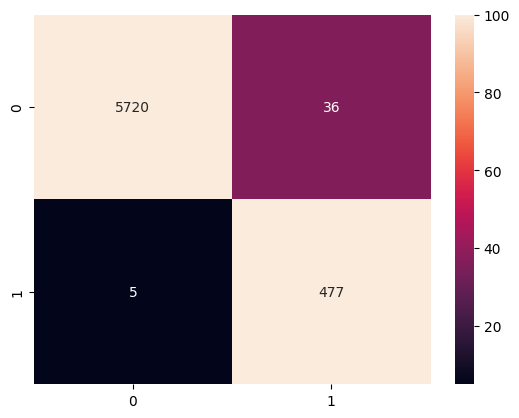

In [ ]:
preds = model2.predict(test_data)
print(preds)
predsnp = np.array(preds)
predsround = np.where(predsnp >= 0.5, 1, 0)
conf=confusion_matrix(test_flags,predsround)
sns.heatmap(conf, annot=True, fmt='d', vmax=100)

In [ ]:
print("Accuracy: ",accuracy_score(test_flags, predsround))
print("Precision: ",precision_score(test_flags, predsround, average='macro'))
print("Recall: ", recall_score(test_flags, predsround, average='macro'))
print("F1: ",f1_score(test_flags, predsround, average='macro'))

Accuracy:  0.9934273805706957
Precision:  0.964475599479047
Recall:  0.9916861063613217
F1:  0.9776114261753852


In [ ]:
"""df = df.drop(df.columns[0], axis = 1)
df = df.drop(df.columns[0], axis = 1)
#df = df.drop(columns = ['CONS_NO'])
df.head()"""

,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,1,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,3.530000,3.410000,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
2,1,0.110000,0.530000,0.450000,0.510000,1.320000,0.710000,0.120000,0.520000,0.550000,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
3,1,0.910000,0.860000,1.100000,0.660000,5.820000,3.170000,1.180000,4.050000,3.660000,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
4,1,11.020000,8.240000,7.940000,7.920000,8.310000,7.390000,8.270000,8.050000,8.950000,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


(31188, 1037)

In [ ]:
"""first0 = 0
last1 = 0
for index, row in df.iterrows():
    if row['FLAG'] == 0 and first0 == 0:
        first0 = index
    if row['FLAG'] == 1:
        last1 = index
print("last 1 flag: " + str(last1))
print("first 0 flag: " + str(first0))"""




last 1 flag: 2408
first 0 flag: 2409


In [ ]:
#Y = df.filter(['0', 'FLAG'], axis = 1)

In [ ]:
#X = df.drop(columns = ['FLAG'])

In [ ]:
"""valid_split = 0.2
test_split  = 0.1

v_point_1 = int(last1*(1-valid_split-test_split))
t_point_1 = int(last1*(1-test_split))


X_train = X[:v_point_1]
Y_train = Y[:v_point_1]
X_valid = X[v_point_1:t_point_1]
Y_valid = Y[v_point_1:t_point_1]
X_test  = X[t_point_1:first0]
Y_test  = Y[t_point_1:first0]

v_point_0 = int((len(X)-last1)*(1-valid_split-test_split))
t_point_0 = int((len(X)-last1)*(1-test_split))

X_train = X_train.append(X[first0:v_point_0])
Y_train = Y_train.append(Y[first0:v_point_0])
X_valid = X_valid.append(X[v_point_0:t_point_0])
Y_valid = Y_valid.append(Y[v_point_0:t_point_0])
X_test  = X_test.append(X[t_point_0:])
Y_test  = Y_test.append(Y[t_point_0:])

print(len(X_train) + len(X_test) + len(X_valid))"""


31188


<ipython-input-12-339cb7c001b4>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X[first0:v_point_0])
<ipython-input-12-339cb7c001b4>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_train = Y_train.append(Y[first0:v_point_0])
<ipython-input-12-339cb7c001b4>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_valid = X_valid.append(X[v_point_0:t_point_0])
<ipython-input-12-339cb7c001b4>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_valid = Y_valid.append(Y[v_point_0:t_point_0])
<ipython-input-12-339cb7c001b4>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

In [ ]:
"""X_t = np.array(X_train, dtype=np.float)
Y_t = np.array(Y_train, dtype=np.float)"""

<ipython-input-13-f8b88cf7a3b9>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_t = np.array(X_train, dtype=np.float)
<ipython-input-13-f8b88cf7a3b9>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_t = np.array(Y_train, dtype=np.float)


In [ ]:
#X_train.head()

,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,1/16/2014,1/17/2014,1/18/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,3.530000,3.410000,0.850000,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
2,0.110000,0.530000,0.450000,0.510000,1.320000,0.710000,0.120000,0.520000,0.550000,0.740000,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
3,0.910000,0.860000,1.100000,0.660000,5.820000,3.170000,1.180000,4.050000,3.660000,3.210000,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
4,11.020000,8.240000,7.940000,7.920000,8.310000,7.390000,8.270000,8.050000,8.950000,8.320000,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
#print(X_t.shape)
#print(Y_t.shape)

(19422, 1034)
(19422, 1)


In [ ]:
"""nb_filter       = 3   # number of filter/kernels in the convolutional layers
filter_length   = 10  # length of the filter/kernel in the convolutional layers
window_size     = X_t.shape[1] # the window size defined by the dataset
nb_features     = 1 # the number of features of the input data
nb_outputs      = 2 # the number of outputs (defined by the target data)"""

In [ ]:
"""model = Sequential()
model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, activation='selu', kernel_initializer='he_normal', input_shape=(window_size, nb_features)))
#model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, activation='relu', kernel_initializer='he_normal', padding = 'same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.2))
model.add(Dense(nb_outputs, activation='softmax'))"""

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1025, 3)           33        
                                                                 
 dropout_9 (Dropout)         (None, 1025, 3)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 1025, 3)           93        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 512, 3)           0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 512, 3)            0         
                                                                 
 flatten_3 (Flatten)         (None, 1536)              0         
                                                      

In [ ]:
"""model = Sequential()
model.add(LSTM(128, input_shape=(X_t.shape[-2], X_t.shape[-1])))
model.add(Dense(2))
model.add(Activation('softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])"""